## XGBoost

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

#xgb
import xgboost as xgb

In [32]:
training = pd.read_csv('../test/training-person2.csv')
test = pd.read_csv('../test/test-person2.csv')
sumbit = test['person'].to_frame()

In [33]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.2

In [34]:
y = training['label']
X = training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [35]:
X.columns

Index(['event', 'ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit', 'searched products',
       'staticpage', 'viewed product', 'visited site', 'brand_categ',
       'top_condition_categ', 'color_model_categ', 'model_brand_views_categ',
       'top_event_categ', 'device_type_categ', 'returning', 'last_event_days',
       'last ad campaign hit days', 'last brand listing days',
       'last checkout days', 'last conversion days',
       'last generic listing days', 'last lead days',
       'last search engine hit days', 'last searched products days',
       'last staticpage days', 'last viewed product days',
       'last visited site days', 'first_event_days', 'events_cout_last_week',
       'events_mean_frec_last_week', 'top_searched_model_categ',
       'region_categ', 'city_categ', 'country_categ'],
      dtype='object')

In [36]:
rdf = xgb.XGBClassifier(learning_rate=0.05, n_estimators=130, max_depth=3,
 min_child_weight=5, gamma=0.3, subsample=0.7, colsample_bytree=0.6, reg_alpha =0.1,seed=RANDOM_SEED)

In [37]:
# Training
rdf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.3, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=130, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.1,
       reg_lambda=1, scale_pos_weight=1, seed=12, silent=True,
       subsample=0.7)

In [38]:
# Predict value
ret = rdf.predict_proba(X_test)

In [39]:
y_test_predictd = ret[:, 1]
roc_auc_score(y_test, y_test_predictd)
#0.8986476370432321

0.8986476370432321

In [40]:
rdf.score(X_test, y_test)

/home/bautista/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9472057687355138

In [41]:
# Predict value kaggle set
# Training
rdf.fit(X, y)
ret = rdf.predict_proba(test.drop(axis=1, labels=['person']))

In [42]:
# Get proba
sumbit['label'] = pd.DataFrame(ret)[1]

Text(0.5,1,'Prediccion Probabilidad de Conversion')

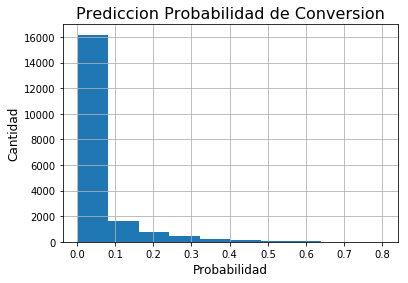

In [43]:
g = (sumbit['label']).hist()
g.set_ylabel('Cantidad', size=12)
g.set_xlabel('Probabilidad', size=12)
g.set_title("Prediccion Probabilidad de Conversion", size=16)

In [44]:
# Get numerical feature importances
importances = list(rdf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: city_categ           Importance: 0.22747750580310822
Variable: last checkout days   Importance: 0.10022520273923874
Variable: last conversion days Importance: 0.06081080064177513
Variable: checkout             Importance: 0.045044999569654465
Variable: viewed product       Importance: 0.041666701436042786
Variable: event                Importance: 0.03603599965572357
Variable: last brand listing days Importance: 0.03490990027785301
Variable: conversion           Importance: 0.03265770152211189
Variable: last viewed product days Importance: 0.03265770152211189
Variable: device_type_categ    Importance: 0.030405400320887566
Variable: brand listing        Importance: 0.029279299080371857
Variable: events_cout_last_week Importance: 0.029279299080371857
Variable: last search engine hit days Importance: 0.028153199702501297
Variable: last generic listing days Importance: 0.02702699974179268
Variable: color_model_categ    Importance: 0.02590090036392212
Variable: first_event_days   

In [45]:
sumbit.to_csv('test/submit-XGB-GS.csv', index=False)